## Імпорт бібліотек

In [1]:
import numpy as np
import pandas as pd
import torch
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Опис даних (Bike Sharing Dataset)

* **instant** — порядковий номер запису
* **dteday** — дата
* **season** — пора року

  * `1`: весна
  * `2`: літо
  * `3`: осінь
  * `4`: зима
* **yr** — рік

  * `0`: 2011
  * `1`: 2012
* **mnth** — місяць (від `1` до `12`)
* **hr** — година (від `0` до `23`)
* **holiday** — чи є день святковим (значення отримані з веб-джерел)
* **weekday** — день тижня
* **workingday** — робочий день (1 — якщо день не є вихідним чи святом, інакше 0)
* **weathersit** — погодні умови:

  * `1`: ясно, кілька хмар, частково хмарно
  * `2`: туман + хмарно, туман + розірвані хмари, туман + кілька хмар
  * `3`: легкий сніг або дощ, гроза з хмарами
  * `4`: сильний дощ, град, гроза, туман або сніг із серпанком
* **temp** — нормалізована температура (в °C), обчислена за формулою
  [(t - t_{min}) / (t_{max} - t_{min})], де
  (t_{min} = -8), (t_{max} = +39) *(для погодинних даних)*
* **atemp** — нормалізована "відчутна" температура (в °C),
  [(t - t_{min}) / (t_{max} - t_{min})], де
  (t_{min} = -16), (t_{max} = +50) *(для погодинних даних)*
* **hum** — нормалізована вологість (значення поділені на 100)
* **windspeed** — нормалізована швидкість вітру (значення поділені на 67)
* **casual** — кількість **непостійних користувачів** (разові оренди)
* **registered** — кількість **зареєстрованих користувачів**
* **cnt** — **загальна кількість оренд велосипедів**, включно з casual і registered


## Завантаження даних




In [2]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT633XHFtkq1Ea7cXs8KUClbApO3RN-eB_y9yJIDP9MDAxgXzxmoaUhb9FUOw-nR0baY6aEr3Yjv76s/pub?gid=1610362465&single=true&output=csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Візуалізація

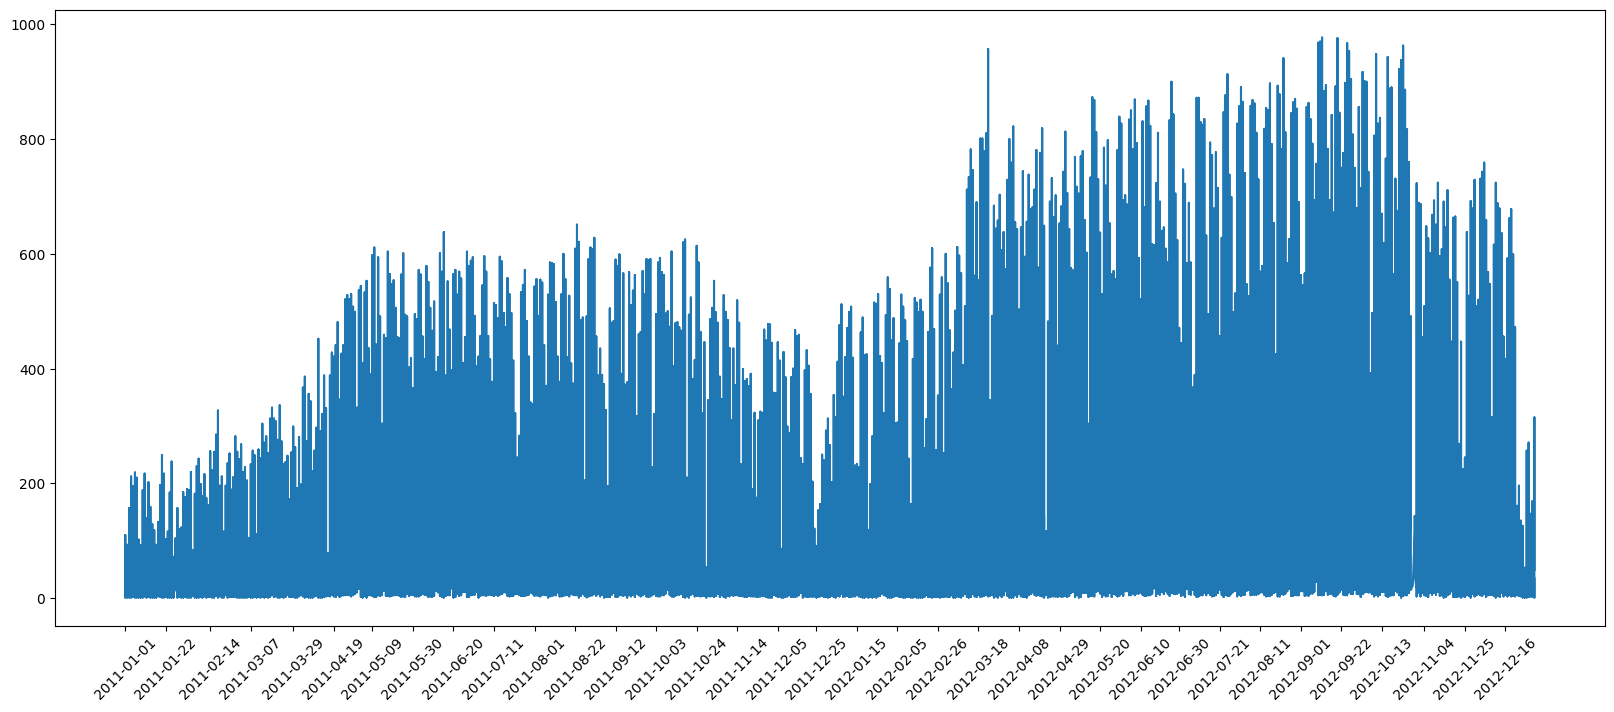

In [3]:
plt.figure(figsize=(20, 8))
plt.plot(data['dteday'], data['cnt'])
plt.xticks(data['dteday'][::500], rotation=45)
plt.show()

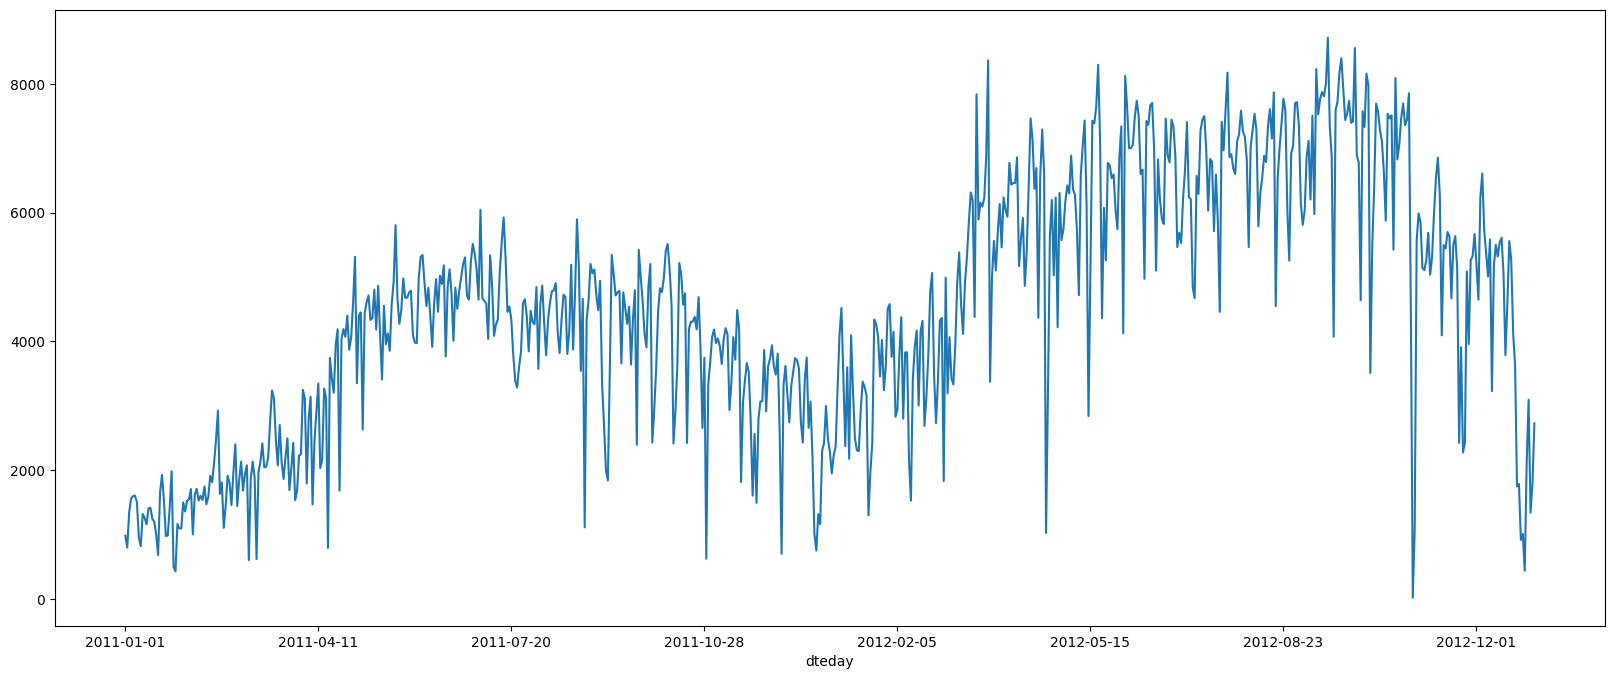

In [4]:
# агреровані дані
daily_data = data.groupby('dteday')['cnt'].sum()
plt.figure(figsize=(20, 8))
daily_data.plot()
plt.show()

#### Розподіл арендованих велосипедів в день

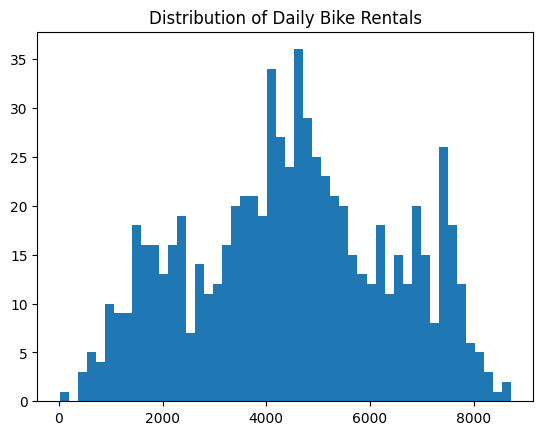

In [5]:
plt.hist(daily_data, bins=50)
plt.title("Distribution of Daily Bike Rentals")
plt.show()

#### Розподіл арендованих велосипедів по годинах в кожному місяці

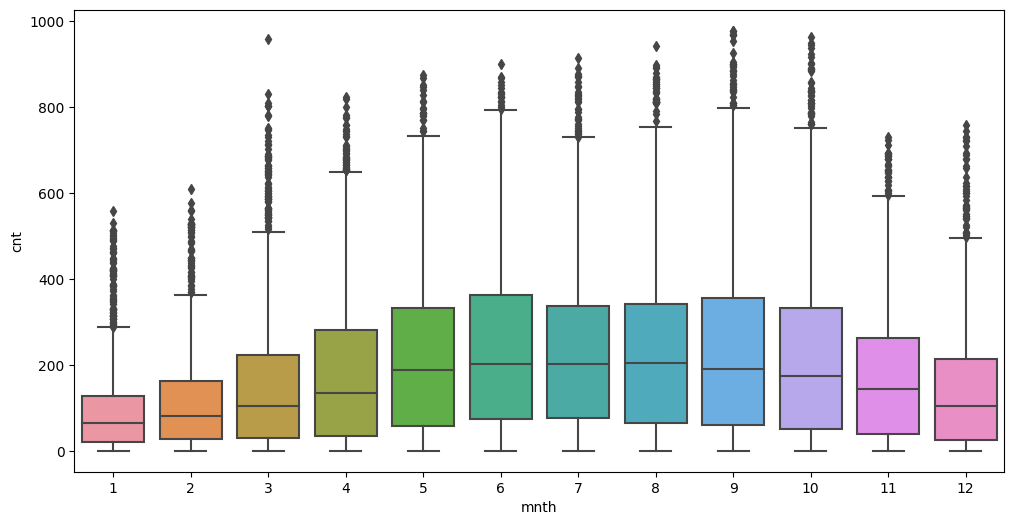

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = data,
            x = 'mnth',
            y = 'cnt')
plt.show()

#### Погодні умови
* Візуалізуємо розподіл погодних умов, а також
* як арендовані велосипеди залежать від погоди

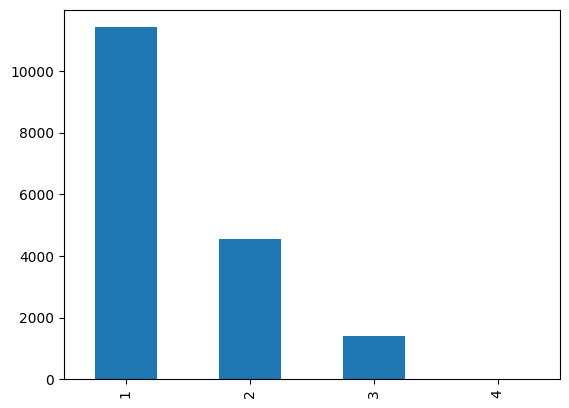

In [7]:
data['weathersit'].value_counts().sort_index().plot(kind='bar')
plt.show()

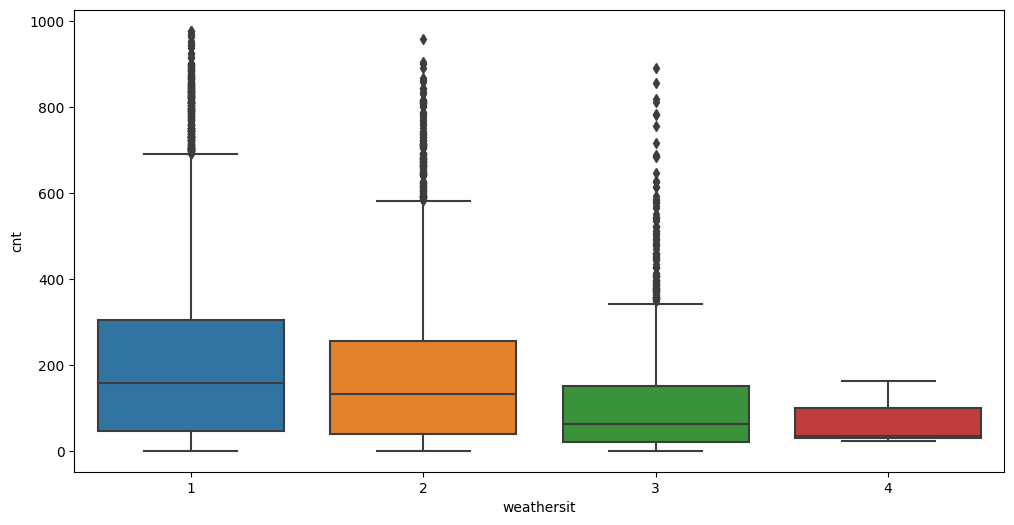

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data,y="cnt",x="weathersit")
plt.show(
)

#### Розподіл між вихідними та робочими днями

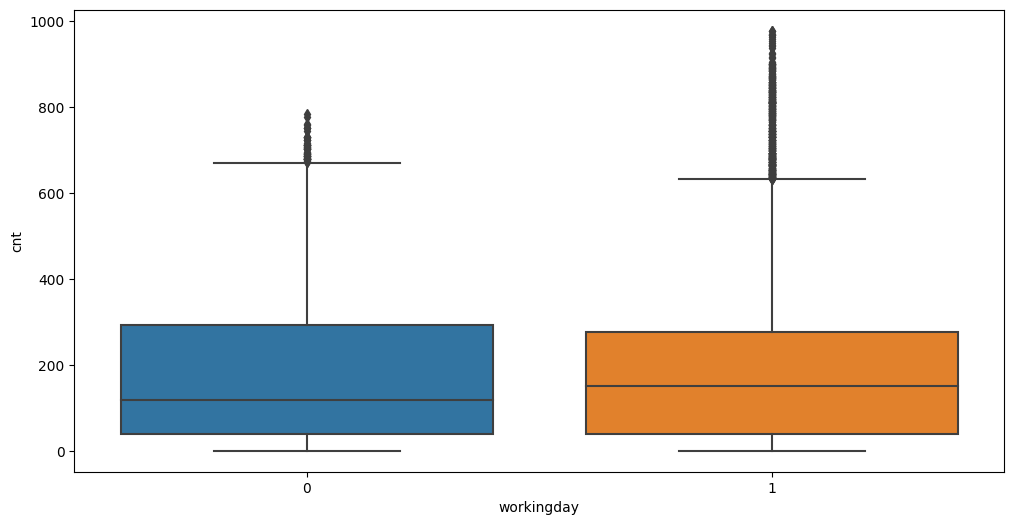

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data,y="cnt",x="workingday")
plt.show(
)

#### Розподіл по годинах доби

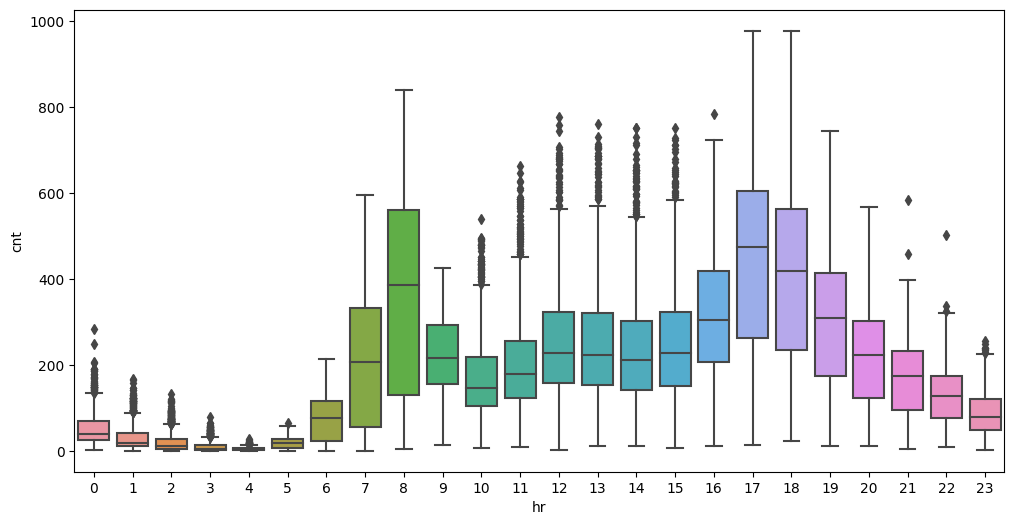

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data,y="cnt",x="hr")
plt.show(
)

#### Залежність від температури

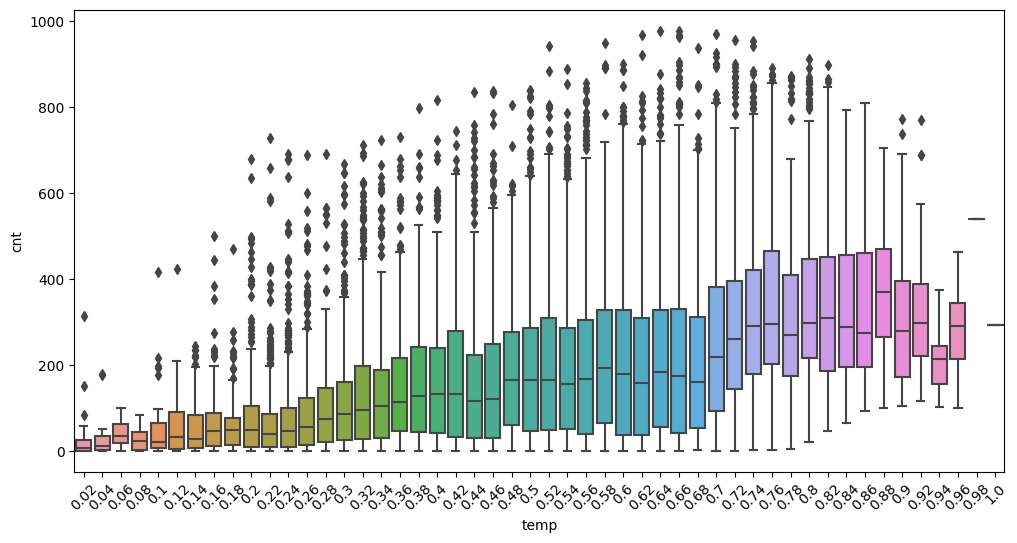

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data,y="cnt",x="temp")
plt.xticks(rotation=45)
plt.show()

## Спостереження

1. Більшість значень змінної **`cnt`** знаходяться в діапазоні від **40 до 280**, проте є й багато **викидів**.
2. У **січні** кількість орендованих велосипедів була **найменшою**, тоді як у **літній сезон** — **найвищою**.
3. Коли **погода ясна**, кількість орендованих велосипедів була **максимальною**; при **тумані** — **меншою**; при **легкому снігу або дощі** — ще **меншою**, а при **сильному дощі чи снігу** — **найнижчою**.
4. У **вихідні дні** оренда велосипедів була **дещо нижчою**, ніж у **робочі дні**.
5. Кількість оренд **зростає з 7 до 9 ранку** та **з 16 до 20 години**, що логічно — це час **початку та завершення роботи або навчання**.
6. **Чим вища температура, тим більша кількість оренд велосипедів**.



In [12]:
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [13]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


## Завдання
* Спрогнозувати кількість арендованих велосипедів`cnt` на наступну годину
* Розбити дані на тренувальну та тестувальну вибірки
* Масштабувати
* Побудувати послідовності вхідних та вихідних даних
* Побудувати нейромережу (звичайну або LSTM)
* Оцінити результат на тестувальній вибірці
* Можна використати лише таргетний стовпець або додати температуру `temp`

In [14]:
# size = int(len(data) * 0.8)
train_dataset = data[:-48]
test_dataset = data[-48:]

In [15]:
from sklearn.preprocessing import MinMaxScaler
bicycle_scaler = MinMaxScaler()
train_scaled_bc = bicycle_scaler.fit_transform(train_dataset[['cnt']])
test_scaled_bc = bicycle_scaler.transform(test_dataset[['cnt']])

temperatur_scaler = MinMaxScaler()
train_scaled_tmp = temperatur_scaler.fit_transform(train_dataset[['temp']])
test_scaled_tmp = temperatur_scaler.transform(test_dataset[['temp']])

train_scaled = np.hstack((train_scaled_bc, train_scaled_tmp))
test_scaled = np.hstack((test_scaled_bc, test_scaled_tmp))

In [16]:
def multifeature_seqence(arr, seq_len=24):
    X, y =[], []
    for i in range(len(arr) - seq_len):
        X.append(arr[i:i+seq_len])
        y.append(arr[i+seq_len][0])
    return np.array(X), np.array(y)

SEQ_LEN = 24
X_train, y_train = multifeature_seqence(train_scaled, SEQ_LEN)
X_test, y_test = multifeature_seqence(test_scaled, SEQ_LEN)
X_train_lstm = X_train[..., np.newaxis]
X_test_lstm = X_test[..., np.newaxis]

In [17]:
model = keras.Sequential([layers.Input(shape=(SEQ_LEN, 2)),
                          layers.LSTM(64, return_sequences=True),
                          layers.LSTM(32),
                          layers.Dense(1)])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 64)            17152     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________


In [18]:
trained_model = model.fit(X_train_lstm, y_train,
                          epochs=10,
                          batch_size=64,
                          verbose=1)

Epoch 1/10
271/271 [==============================] - 9s 20ms/step - loss: 0.0171
Epoch 2/10
271/271 [==============================] - 6s 22ms/step - loss: 0.0068
Epoch 3/10
271/271 [==============================] - 5s 20ms/step - loss: 0.0056
Epoch 4/10
271/271 [==============================] - 5s 20ms/step - loss: 0.0052
Epoch 5/10
271/271 [==============================] - 5s 20ms/step - loss: 0.0048
Epoch 6/10
271/271 [==============================] - 6s 21ms/step - loss: 0.0041
Epoch 7/10
271/271 [==============================] - 6s 21ms/step - loss: 0.0035
Epoch 8/10
271/271 [==============================] - 6s 21ms/step - loss: 0.0032
Epoch 9/10
271/271 [==============================] - 6s 21ms/step - loss: 0.0030
Epoch 10/10
271/271 [==============================] - 5s 19ms/step - loss: 0.0028


In [19]:
y_preds = model.predict(X_test)
y_rescaled = bicycle_scaler.inverse_transform(y_preds)

1/1 [==============================] - 1s 677ms/step


In [20]:
y_test_rescaled = bicycle_scaler.inverse_transform(y_test.reshape(-1, 1))

In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(y_rescaled, y_test_rescaled)
print(f'R2-score = {r2}')

R2-score = 0.813446496437278


In [22]:
test_dataset = test_dataset[SEQ_LEN:]

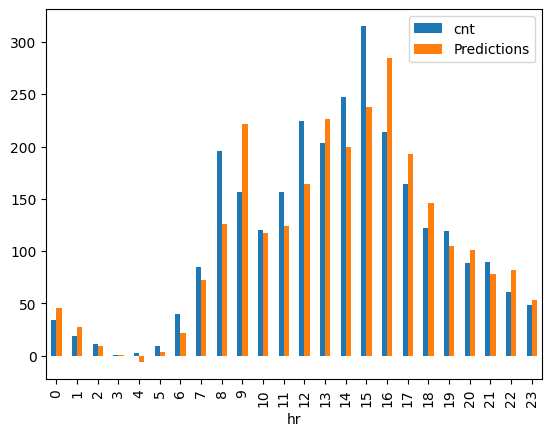

In [25]:
test_dataset['Predictions'] = y_rescaled
test_dataset.groupby(test_dataset['hr'])[['cnt','Predictions']].sum().plot(kind='bar')
plt.show()